In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import os
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Подготовка датасетов (отсеивание остатков)

In [4]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
df_nemo

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.043496,0.041205,0.043296,0.049496,0.018957,0.020623,0.043043,0.037323,0.030662,0.021557,...,-0.006893,-0.016234,-0.021648,-0.021540,0.006230,0.002845,-0.005700,-0.013671,0.009085,2002-01-01
1,0.047268,0.046536,0.044069,0.050039,0.019246,0.021221,0.045237,0.040602,0.034548,0.025336,...,0.000493,-0.009252,-0.014643,-0.014258,0.013718,0.008249,0.000039,-0.006766,0.014637,2002-01-02
2,0.044126,0.044443,0.036774,0.041407,0.010971,0.014720,0.043880,0.036382,0.029206,0.017985,...,-0.004167,-0.012748,-0.017804,-0.017722,0.007621,-0.002128,-0.008281,-0.012912,0.003973,2002-01-03
3,0.062028,0.062371,0.050494,0.054275,0.025246,0.029794,0.058684,0.048697,0.041713,0.030885,...,-0.010836,-0.015992,-0.018431,-0.017348,-0.000368,-0.010376,-0.011623,-0.014038,0.001755,2002-01-04
4,0.071914,0.072430,0.058286,0.061006,0.027560,0.035322,0.063933,0.056161,0.049207,0.039845,...,-0.000004,-0.003843,-0.003772,-0.002390,0.010757,0.006049,0.003313,-0.000569,0.019566,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.045611,0.054914,0.059584,0.077185,0.028578,0.029135,0.054378,0.072661,0.074267,0.059977,...,0.111664,0.117896,0.114245,0.115759,0.105825,0.109763,0.112713,0.115663,0.101524,2002-12-27
361,0.040227,0.046561,0.047235,0.068944,0.020274,0.021585,0.049065,0.066814,0.069268,0.056660,...,0.103190,0.108623,0.107286,0.109981,0.097514,0.100478,0.104291,0.107933,0.094374,2002-12-28
362,0.036336,0.040292,0.039558,0.064122,0.014276,0.015902,0.045349,0.060325,0.064344,0.053484,...,0.099011,0.102547,0.102639,0.105849,0.095617,0.095864,0.098940,0.101429,0.090882,2002-12-29
363,0.032965,0.035805,0.034460,0.062205,0.009790,0.011852,0.042518,0.053357,0.060313,0.050977,...,0.098158,0.100042,0.100620,0.103715,0.097523,0.095937,0.098053,0.098531,0.092439,2002-12-30


In [5]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.034992,0.034718,0.032032,0.027844,0.026310,0.028339,0.027947,0.027634,0.026690,0.016180,...,-0.020535,-0.027864,-0.034043,-0.034043,0.008050,0.000913,-0.021561,-0.030222,0.001356,2002-01-01
1,0.058270,0.058306,0.055602,0.050686,0.049921,0.051845,0.052467,0.052148,0.051075,0.040347,...,0.022316,0.014934,0.009822,0.009822,0.050113,0.046925,0.027756,0.020172,0.049706,2002-01-02
2,0.062436,0.062537,0.059925,0.055279,0.054040,0.055957,0.057700,0.057536,0.056527,0.046154,...,0.012881,0.001712,-0.008514,-0.008514,0.039593,0.032066,0.008459,-0.002192,0.025435,2002-01-03
3,0.063424,0.063512,0.061063,0.056140,0.054533,0.056757,0.059166,0.058829,0.057676,0.046912,...,-0.017130,-0.022521,-0.022301,-0.022301,0.002329,-0.001674,-0.016318,-0.021154,0.004181,2002-01-04
4,0.056305,0.056191,0.053409,0.047372,0.047233,0.049387,0.050545,0.049952,0.048565,0.036534,...,0.012275,0.009005,0.006407,0.006407,0.034164,0.037784,0.022573,0.016598,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.047681,0.039707,0.041549,0.063631,0.066376,0.062971,0.055390,0.049154,0.048711,...,0.080870,0.076975,0.081327,0.081327,0.091999,0.084992,0.073588,0.072650,0.071904,2002-12-27
361,0.056429,0.049822,0.040671,0.040778,0.063836,0.067421,0.064336,0.056341,0.049220,0.048054,...,0.059155,0.056916,0.064658,0.064658,0.071171,0.066003,0.055439,0.054380,0.060337,2002-12-28
362,0.059627,0.053090,0.045162,0.045927,0.066616,0.070397,0.067439,0.059568,0.052695,0.052243,...,0.059734,0.057916,0.064062,0.064062,0.076493,0.074301,0.060417,0.056684,0.070495,2002-12-29
363,0.066121,0.059172,0.051419,0.052143,0.075578,0.078953,0.074769,0.066495,0.059423,0.059202,...,0.067323,0.065050,0.070196,0.070196,0.084828,0.082266,0.066639,0.062536,0.074877,2002-12-30


In [6]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

## Валидация с формированием набора предсказанных значений со всеми заблаговременностями для каждой ячейки test

In [8]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])
forc_n=30
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':
        print(column)
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forc_n:]
        test.index = df_rean['dates'][-forc_n:]
        data = df_rean[column][:-forc_n]
        data.index = df_rean['dates'][:-forc_n]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forc_n:]
        nemo_pr.index = df_nemo['dates'][-forc_n:]
        
        ARIMA_MSE_errors_list=[]
        ARIMA_MAE_errors_list=[]
        ARIMA_MAPE_errors_list=[]
        ARIMA_R2_errors_list=[]
        
        HYB_MSE_errors_list=[]
        HYB_MAE_errors_list=[]
        HYB_MAPE_errors_list=[]
        HYB_R2_errors_list=[]
        
        for j in range (forc_n): # для каждой ячейки из test
            #print(j)
            predictions_list=[]
            for i in range (forc_n): # для каждой из заблаговременностей
                data = df_rean[column][:-forc_n+j-i] # выделяем обучающую выборку
                f_size = i+1 # величина предсказания
                
                stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
                model_res = stlf.fit()
                forecasts_i = model_res.forecast(f_size).tolist()[-1] # делаем предсказание и берем последнее значение
                predictions_list.append(forecasts_i)# добавляем предсказание в список предсказаний со всеми заблаговременостями
            
            real_val_list=np.full(forc_n, test[j]) # создаем массив верных значений
            nemo_real_val_list=np.full(forc_n, nemo_pr[j]) # создаем массив верных значений по NEMO
            
            HYB_pr=(predictions_list+nemo_real_val_list)/2 # добавляем к списку предсказаний значение NEMO и усредняем            
            
            
            # считаем ошибки как отклонения от прямой
            ARIMA_MSE_errors_list.append(mean_squared_error(real_val_list, predictions_list))
            ARIMA_MAE_errors_list.append(mean_absolute_error(real_val_list, predictions_list))
            ARIMA_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-predictions_list)/real_val_list)*100,3))
            ARIMA_R2_errors_list.append(r2_score(real_val_list, predictions_list))
            
            HYB_MSE_errors_list.append(mean_squared_error(real_val_list, HYB_pr))
            HYB_MAE_errors_list.append(mean_absolute_error(real_val_list, HYB_pr))
            HYB_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-HYB_pr)/real_val_list)*100,3))
            HYB_R2_errors_list.append(r2_score(real_val_list, HYB_pr))
            
            '''
            print('Real Value: %s'%str(test[j]))
            plt.plot(np.arange(len(predictions_list)), predictions_list, label='prediction for timestep')
            plt.axhline(y=test[j], color='r', linestyle='-', label='real value')
            plt.xlabel("Заблаговременность прогноза (дни)")
            plt.legend()
            plt.grid()
            plt.show()
            '''
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': np.mean(ARIMA_MSE_errors_list),
                                      'MAE_ARIMA': np.mean(ARIMA_MAE_errors_list),
                                      'MAPE_ARIMA':np.mean(ARIMA_MAPE_errors_list),
                                      'R^2_ARIMA': np.mean(ARIMA_R2_errors_list),
                                      'MSE_HYB':np.mean(HYB_MSE_errors_list),
                                      'MAE_HYB':np.mean(HYB_MAE_errors_list),
                                      'MAPE_HYB':np.mean(HYB_MAPE_errors_list),
                                      'R^2_HYB':np.mean(HYB_R2_errors_list),
                                     } , ignore_index=True)
errors_df 

76.04_8.72
75.84_8.72
75.64_8.72
75.44_8.72
76.44_9.72
76.24_9.72
76.04_9.72
75.84_9.72
75.64_9.72
75.44_9.72
76.84_10.72
76.64_10.72
76.44_10.72
76.24_10.72
76.04_10.72
75.84_10.72
75.64_10.72
75.44_10.72
75.24_10.72
77.24_11.72
77.04_11.72
76.84_11.72
76.64_11.72
76.44_11.72
76.24_11.72
76.04_11.72
75.84_11.72
75.64_11.72
75.44_11.72
75.24_11.72
75.04_11.72
77.44_12.72
77.24_12.72
77.04_12.72
76.84_12.72
76.64_12.72
76.44_12.72
76.24_12.72
76.04_12.72
75.84_12.72
75.64_12.72
75.44_12.72
75.24_12.72
75.04_12.72
74.84_12.72
76.84_13.72
76.64_13.72
76.44_13.72
76.24_13.72
76.04_13.72
75.84_13.72
75.64_13.72
75.44_13.72
75.24_13.72
75.04_13.72
74.84_13.72
76.64_14.72
76.44_14.72
76.24_14.72
76.04_14.72
75.84_14.72
75.64_14.72
75.44_14.72
75.24_14.72
75.04_14.72
74.84_14.72
74.64_14.72
76.24_15.72
76.04_15.72
75.84_15.72
75.64_15.72
75.44_15.72
75.24_15.72
75.04_15.72
74.84_15.72
74.64_15.72
74.44_15.72
76.24_16.72
76.04_16.72
75.84_16.72
75.64_16.72
75.44_16.72
75.24_16.72
75.04_16.72
74

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB
0,76.04_8.72,0.000165,0.011004,23.738167,-1.342406e+30,0.000150,0.010271,19.720200,-7.870194e+29
1,75.84_8.72,0.000166,0.010983,28.132100,-9.355522e+29,0.000196,0.012079,29.525300,-9.560657e+29
2,75.64_8.72,0.000085,0.007364,21.935400,-1.309905e+30,0.000175,0.011262,32.051400,-3.179836e+30
3,75.44_8.72,0.000061,0.005810,13.870167,-8.473070e+29,0.000192,0.011139,26.674567,-2.612384e+30
4,76.44_9.72,0.000092,0.008220,11.488333,-3.448313e+29,0.000349,0.015812,21.028467,-9.383358e+29
...,...,...,...,...,...,...,...,...,...
272,77.04_31.72,0.000485,0.017950,0.669133,-5.616211e+30,0.000726,0.021271,23.904833,-1.468310e+31
273,76.84_31.72,0.000499,0.018238,18.814300,-4.263497e+30,0.000805,0.022544,90.346833,-1.973738e+31
274,76.64_31.72,0.000549,0.018594,24.598967,-6.816929e+30,0.000840,0.023430,97.494167,-7.039134e+31
275,76.44_31.72,0.000620,0.020297,20.477200,-3.209339e+30,0.000852,0.023492,52.340800,-2.366865e+31


In [9]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000165,0.011004,23.738167,-1.342406e+30,0.000150,0.010271,19.720200,-7.870194e+29,-0.000015,-0.000732,-4.017967,-5.553869e+29
1,75.84_8.72,0.000166,0.010983,28.132100,-9.355522e+29,0.000196,0.012079,29.525300,-9.560657e+29,0.000029,0.001096,1.393200,2.051352e+28
2,75.64_8.72,0.000085,0.007364,21.935400,-1.309905e+30,0.000175,0.011262,32.051400,-3.179836e+30,0.000090,0.003899,10.116000,1.869931e+30
3,75.44_8.72,0.000061,0.005810,13.870167,-8.473070e+29,0.000192,0.011139,26.674567,-2.612384e+30,0.000131,0.005329,12.804400,1.765077e+30
4,76.44_9.72,0.000092,0.008220,11.488333,-3.448313e+29,0.000349,0.015812,21.028467,-9.383358e+29,0.000257,0.007592,9.540133,5.935045e+29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,77.04_31.72,0.000485,0.017950,0.669133,-5.616211e+30,0.000726,0.021271,23.904833,-1.468310e+31,0.000241,0.003321,23.235700,9.066889e+30
273,76.84_31.72,0.000499,0.018238,18.814300,-4.263497e+30,0.000805,0.022544,90.346833,-1.973738e+31,0.000306,0.004306,71.532533,1.547388e+31
274,76.64_31.72,0.000549,0.018594,24.598967,-6.816929e+30,0.000840,0.023430,97.494167,-7.039134e+31,0.000291,0.004836,72.895200,6.357441e+31
275,76.44_31.72,0.000620,0.020297,20.477200,-3.209339e+30,0.000852,0.023492,52.340800,-2.366865e+31,0.000233,0.003195,31.863600,2.045931e+31


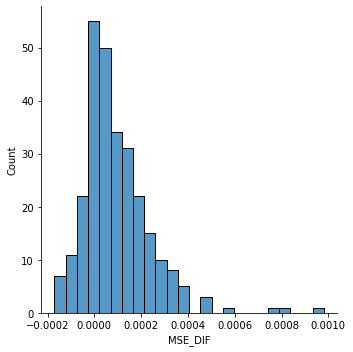

In [10]:
sns.displot(errors_df, x="MSE_DIF")

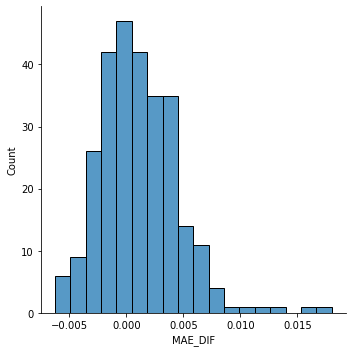

In [11]:
sns.displot(errors_df, x="MAE_DIF")

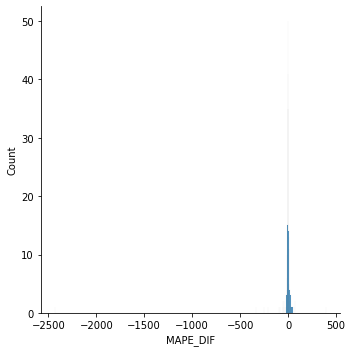

In [12]:
sns.displot(errors_df, x="MAPE_DIF")